In [181]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [182]:
# Load the dataset
df = pd.read_csv("final PPMI dataset.csv")


In [183]:
# ---- Basic Dataset Overview ----
print("Shape of dataset:", df.shape)
print("First 5 rows:")
print(df.head())


Shape of dataset: (241, 90)
First 5 rows:
   PATNO  NP1PTOT  NP2PTOT  NP3TOT  NP4TOT  PDAGE_DIAG_AGE_OL  ANYFAMPD_OL  \
0   3003     12.0      3.0    26.0     0.0               54.0          1.0   
1   3010      8.0      7.0     9.0     0.0               46.0          0.0   
2   3018      5.0      4.0    19.0     0.0               61.0          1.0   
3   3021      5.0      3.0    20.0     0.0               61.0          0.0   
4   3023      5.0      6.0    31.0     0.0               69.0          NaN   

   BIOMOMPD_OL  BIODADPD_OL  MAGMOTHPD_OL  ...  PDSS_DSTRSSING_DREAMS_OL  \
0          0.0          1.0           0.0  ...                       0.0   
1          NaN          NaN           NaN  ...                       3.0   
2          0.0          1.0           0.0  ...                       0.0   
3          NaN          NaN           NaN  ...                       1.0   
4          NaN          NaN           NaN  ...                       0.0   

   PDSS_DSTRSSING_HALLUC_OL  PDS

In [184]:
print("\nData Types and Missing Values:")
print(df.info())



Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 90 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PATNO                       241 non-null    int64  
 1   NP1PTOT                     241 non-null    float64
 2   NP2PTOT                     240 non-null    float64
 3   NP3TOT                      241 non-null    float64
 4   NP4TOT                      169 non-null    float64
 5   PDAGE_DIAG_AGE_OL           241 non-null    float64
 6   ANYFAMPD_OL                 231 non-null    float64
 7   BIOMOMPD_OL                 80 non-null     float64
 8   BIODADPD_OL                 80 non-null     float64
 9   MAGMOTHPD_OL                80 non-null     float64
 10  MAGFATHPD_OL                80 non-null     float64
 11  PAGMOTHPD_OL                80 non-null     float64
 12  PAGFATHPD_OL                80 non-null     float64
 13  HAS

In [185]:
print("\nSummary Statistics:")
print(df.describe(include='all'))


Summary Statistics:
               PATNO     NP1PTOT     NP2PTOT      NP3TOT      NP4TOT  \
count     241.000000  241.000000  240.000000  241.000000  169.000000   
mean   140566.236515    5.535270    6.616667   22.178423    0.881657   
std     88568.754572    3.810047    4.788730   10.641375    1.765464   
min      3003.000000    0.000000    0.000000    0.000000    0.000000   
25%     73887.000000    3.000000    3.000000   15.000000    0.000000   
50%    143757.000000    5.000000    6.000000   21.000000    0.000000   
75%    211973.000000    8.000000    9.000000   28.000000    0.000000   
max    347374.000000   18.000000   24.000000   56.000000    7.000000   

       PDAGE_DIAG_AGE_OL  ANYFAMPD_OL  BIOMOMPD_OL  BIODADPD_OL  MAGMOTHPD_OL  \
count         241.000000   231.000000    80.000000    80.000000      80.00000   
mean           62.344398     0.606061     0.200000     0.262500       0.05000   
std             9.031522     0.707572     0.402524     0.442769       0.21932   
min   

In [186]:
# ---- Missing Value Analysis ----
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
print("\nMissing Data:")
print(missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage', ascending=False))


Missing Data:
                       Missing Values  Percentage
RETURNPD_DIAG_COND_OL             239   99.170124
BIOMOMPD_OL                       161   66.804979
MAGMOTHPD_OL                      161   66.804979
MAGFATHPD_OL                      161   66.804979
PAGMOTHPD_OL                      161   66.804979
...                               ...         ...
TMGAMBLE                            1    0.414938
PTINBOTH                            1    0.414938
TMEAT                               1    0.414938
CNTRLBUY                            1    0.414938
CNTRLDSM                            1    0.414938

[80 rows x 2 columns]


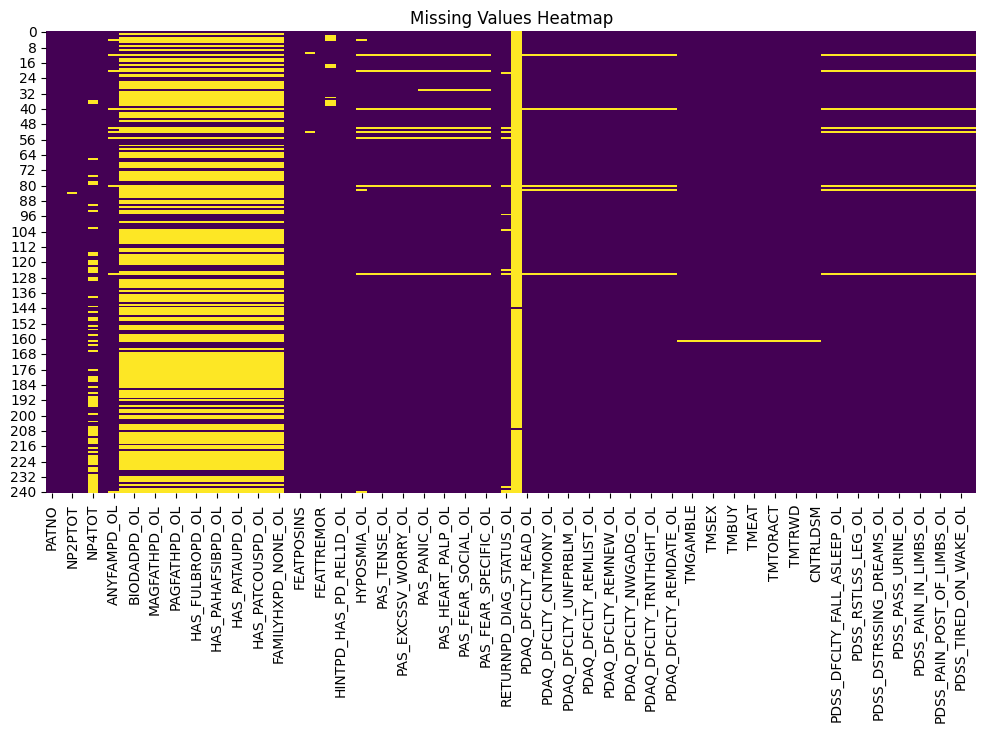

In [187]:
# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

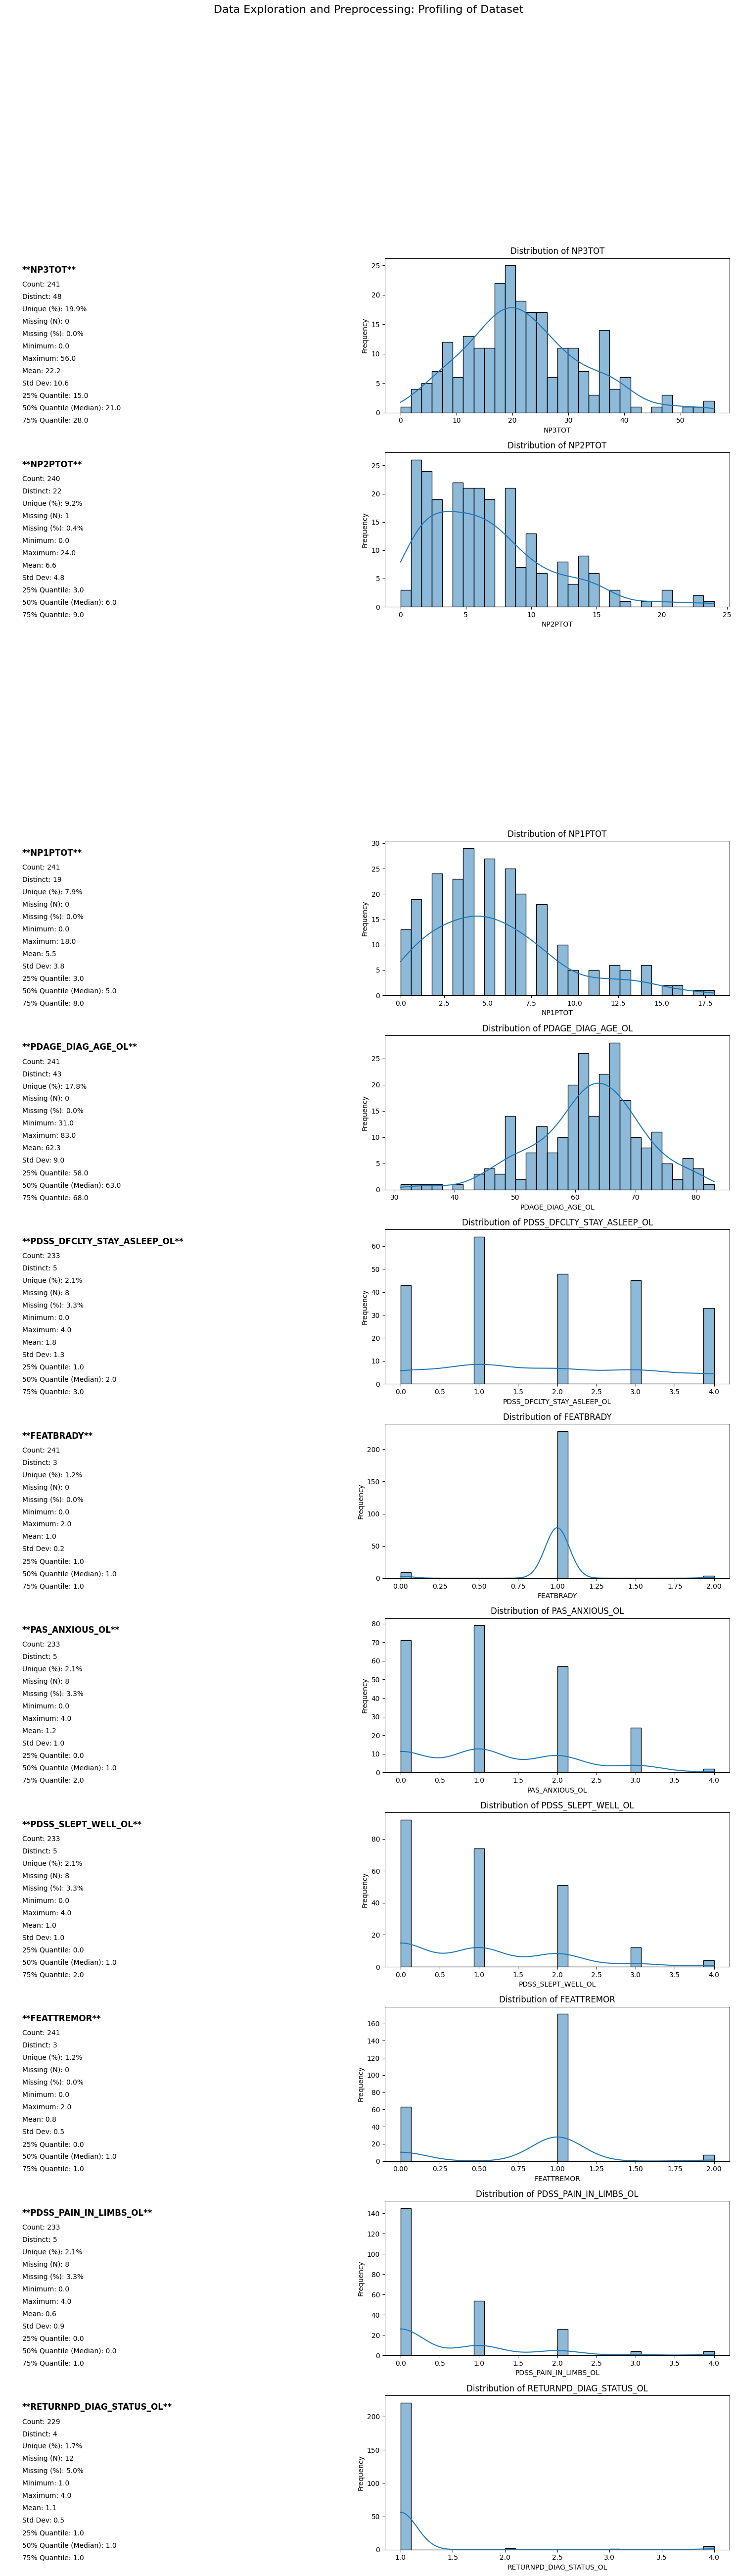

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import numpy as np 


# --- 2. Define a function to generate the summary for a single column --- 

def generate_column_summary(df, column_name): 

    column_data = df[column_name] 

 

    # Calculate statistics 

    count = column_data.count() 

    distinct = column_data.nunique() 

    unique_percent = (distinct / count) * 100 if count > 0 else 0 

 

    missing_count = column_data.isnull().sum() 

    missing_percent = (missing_count / len(df)) * 100 

 

    # For numerical columns: 

    if pd.api.types.is_numeric_dtype(column_data): 

        min_val = column_data.min() 

        max_val = column_data.max() 

        mean_val = column_data.mean() 

        std_val = column_data.std() 

        # Quantiles 

        q25 = column_data.quantile(0.25) 

        q50 = column_data.quantile(0.50) # Median 

        q75 = column_data.quantile(0.75) 

    else: # For non-numerical (e.g., object/categorical) columns, these don't apply directly 

        min_val, max_val, mean_val, std_val = np.nan, np.nan, np.nan, np.nan 

        q25, q50, q75 = np.nan, np.nan, np.nan 

 

    summary = { 

        'Count': count, 

        'Distinct': distinct, 

        'Unique (%)': f'{unique_percent:.1f}%', 

        'Missing (N)': missing_count, 

        'Missing (%)': f'{missing_percent:.1f}%', 

        'Minimum': f'{min_val:.1f}' if pd.api.types.is_numeric_dtype(column_data) and not pd.isna(min_val) else min_val, 

        'Maximum': f'{max_val:.1f}' if pd.api.types.is_numeric_dtype(column_data) and not pd.isna(max_val) else max_val, 

        'Mean': f'{mean_val:.1f}' if pd.api.types.is_numeric_dtype(column_data) and not pd.isna(mean_val) else mean_val, 

        'Std Dev': f'{std_val:.1f}' if pd.api.types.is_numeric_dtype(column_data) and not pd.isna(std_val) else std_val, 

        '25% Quantile': f'{q25:.1f}' if pd.api.types.is_numeric_dtype(column_data) and not pd.isna(q25) else q25, 

        '50% Quantile (Median)': f'{q50:.1f}' if pd.api.types.is_numeric_dtype(column_data) and not pd.isna(q50) else q50, 

        '75% Quantile': f'{q75:.1f}' if pd.api.types.is_numeric_dtype(column_data) and not pd.isna(q75) else q75, 

    } 

    return summary 

 

# --- 3. Generate and display summaries and histograms for selected columns --- 

 

# Choose the columns you want to profile. 

# You can select all numerical columns, or a specific list. 

# For demonstration, let's pick a few example columns from your image's style. 

# Replace these with actual column names from your 'df' 

columns_to_profile =[ 'SYMPTOM_SUM', 

    'NP3TOT', #(UPDRS Part III Total Motor Score) 

    'NP2PTOT',#(UPDRS Part II Activities of Daily Living Score) 

    'PSG_LVL',#(Possible Psychiatric/Sleep Scale Level) 

    'NP1PTOT', #(UPDRS Part I Non-Motor Experiences Score) 

    'PDAGE_DIAG_AGE_OL', # (Age at diagnosis) 

    'PDSS_DFCLTY_STAY_ASLEEP_OL', #(PDSS Difficulty - Staying Asleep) 

    'FEATBRADY', #(Feature: Bradykinesia) 

    'PAS_ANXIOUS_OL', #(Parkinson's Anxiety Scale - Anxious) 

    'PDSS_SLEPT_WELL_OL', #(PDSS - Slept Well) 

    'FEATTREMOR',#(Feature: Tremor) 

    'PDSS_PAIN_IN_LIMBS_OL', #(PDSS - Pain in Limbs) 

    'RETURNPD_DIAG_STATUS_OL' #(Return Parkinson's Diagnosis Status) 

] 

 

# Adjust the figure size as needed 

plt.figure(figsize=(15, 4 * len(columns_to_profile))) # Adjust height based on number of columns 

 

for i, col in enumerate(columns_to_profile): 

    if col in df.columns: 

        summary_data = generate_column_summary(df, col) 

 

        # Create a subplot for each column (two columns per row: stats and histogram) 

        ax1 = plt.subplot(len(columns_to_profile), 2, 2*i + 1) # Stats subplot 

        ax2 = plt.subplot(len(columns_to_profile), 2, 2*i + 2) # Histogram subplot 

 

        # Display statistics as text on ax1 

        ax1.text(0.05, 0.95, f'**{col.upper()}**', transform=ax1.transAxes, fontsize=12, va='top', weight='bold') 

        y_offset = 0.85 

        for key, value in summary_data.items(): 

            ax1.text(0.05, y_offset, f'{key}: {value}', transform=ax1.transAxes, fontsize=10, va='top') 

            y_offset -= 0.08 

        ax1.axis('off') # Hide axes for the text subplot 

 

        # Plot histogram on ax2 

        if pd.api.types.is_numeric_dtype(df[col]): 

            sns.histplot(df[col].dropna(), kde=True, ax=ax2, bins=30) 

            ax2.set_title(f'Distribution of {col}', fontsize=12) 

            ax2.set_xlabel(col) 

            ax2.set_ylabel('Frequency') 

        else: 

            # For non-numeric, a countplot might be more appropriate, or just a bar chart 

            # For simplicity, if not numeric, we'll just put a placeholder message 

            ax2.text(0.5, 0.5, 'Non-numeric data\n(Histogram not applicable)', horizontalalignment='center', 

                     verticalalignment='center', transform=ax2.transAxes, fontsize=10) 

            ax2.axis('off') # Hide axes 

 

    else: 

        print(f"Warning: Column '{col}' not found in the DataFrame.") 

 

 

plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent overlap, leaving space for title 

plt.suptitle('Data Exploration and Preprocessing: Profiling of Dataset', fontsize=16, y=1.0) # Main title 

plt.show() 

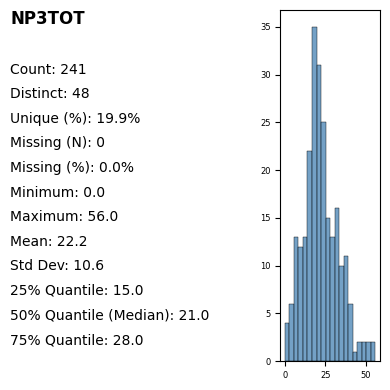

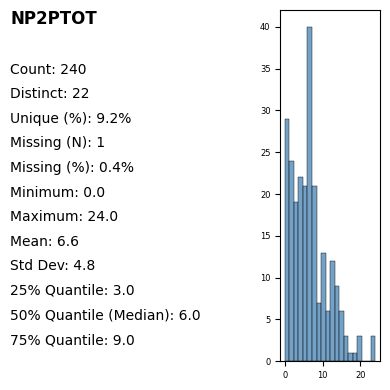

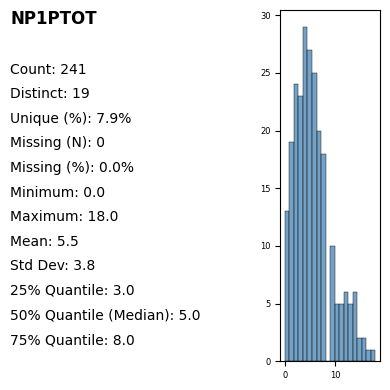

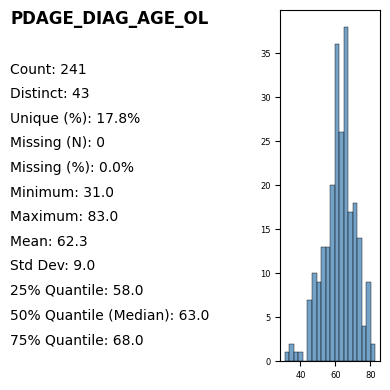

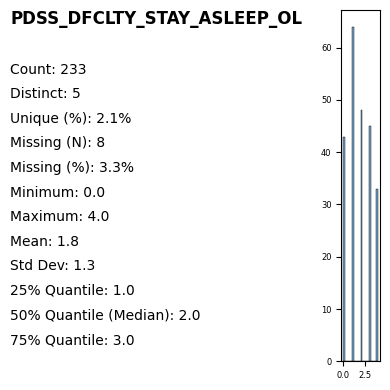

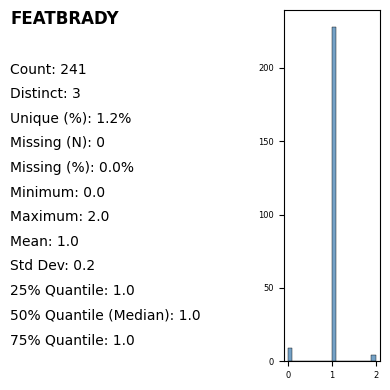

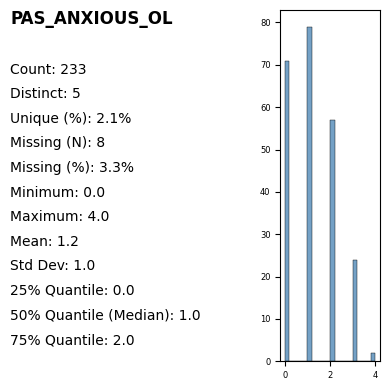

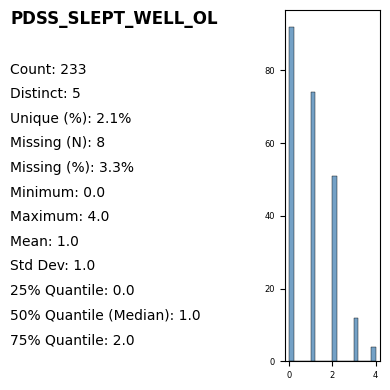

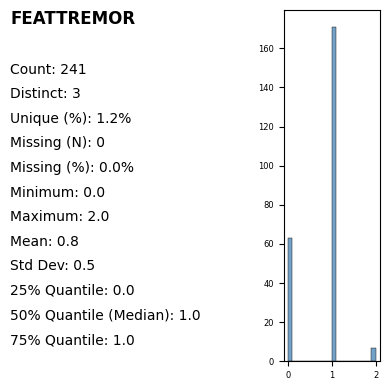

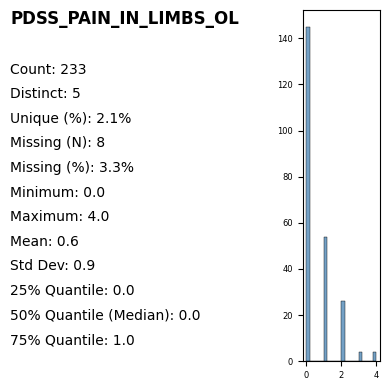

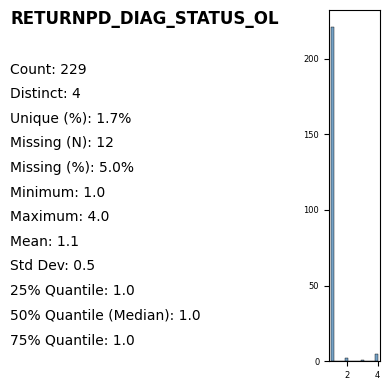

In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1. Load your dataset (if not already loaded) ---
# Example:
# df = pd.read_csv('your_dataset.csv')
# Or if it's already in your notebook, just use its name, e.g., df = your_dataframe_name

# --- 2. Define a function to generate the summary for a single column ---
def generate_column_summary(df, column_name):
    column_data = df[column_name]

    count = column_data.count()
    distinct = column_data.nunique()
    unique_percent = (distinct / count) * 100 if count > 0 else 0

    missing_count = column_data.isnull().sum()
    missing_percent = (missing_count / len(df)) * 100

    if pd.api.types.is_numeric_dtype(column_data):
        min_val = column_data.min()
        max_val = column_data.max()
        mean_val = column_data.mean()
        std_val = column_data.std()
        q25 = column_data.quantile(0.25)
        q50 = column_data.quantile(0.50)
        q75 = column_data.quantile(0.75)
    else:
        min_val, max_val, mean_val, std_val = np.nan, np.nan, np.nan, np.nan
        q25, q50, q75 = np.nan, np.nan, np.nan

    summary = {
        'Count': count,
        'Distinct': distinct,
        'Unique (%)': f'{unique_percent:.1f}%',
        'Missing (N)': missing_count,
        'Missing (%)': f'{missing_percent:.1f}%',
        'Minimum': f'{min_val:.1f}' if pd.notna(min_val) else '-',
        'Maximum': f'{max_val:.1f}' if pd.notna(max_val) else '-',
        'Mean': f'{mean_val:.1f}' if pd.notna(mean_val) else '-',
        'Std Dev': f'{std_val:.1f}' if pd.notna(std_val) else '-',
        '25% Quantile': f'{q25:.1f}' if pd.notna(q25) else '-',
        '50% Quantile (Median)': f'{q50:.1f}' if pd.notna(q50) else '-',
        '75% Quantile': f'{q75:.1f}' if pd.notna(q75) else '-',
    }
    return summary

# --- 3. Generate and display summaries and histograms for selected columns ---

columns_to_profile =[ 
    'SYMPTOM_SUM', 'NP3TOT', 'NP2PTOT', 'PSG_LVL', 'NP1PTOT', 
    'PDAGE_DIAG_AGE_OL', 'PDSS_DFCLTY_STAY_ASLEEP_OL', 'FEATBRADY', 
    'PAS_ANXIOUS_OL', 'PDSS_SLEPT_WELL_OL', 'FEATTREMOR', 
    'PDSS_PAIN_IN_LIMBS_OL', 'RETURNPD_DIAG_STATUS_OL'
]

# Instead of large global figure, loop and create small blocks one by one
for col in columns_to_profile:
    if col in df.columns:
        summary_data = generate_column_summary(df, col)

        fig = plt.figure(figsize=(4, 4))  # compact square block

        # Left side: Text summary (2/3rd of space)
        ax1 = plt.subplot2grid((1, 3), (0, 0), colspan=2)
        ax1.axis('off')
        ax1.text(0, 1.0, f'{col.upper()}', fontsize=12, fontweight='bold', va='top')
        y_offset = 0.85
        for key, value in summary_data.items():
            ax1.text(0, y_offset, f'{key}: {value}', fontsize=10, va='top')
            y_offset -= 0.07

        # Right side: Histogram (1/3rd of space)
        ax2 = plt.subplot2grid((1, 3), (0, 2))
        if pd.api.types.is_numeric_dtype(df[col]):
            sns.histplot(df[col].dropna(), kde=False, ax=ax2, bins=20, color='steelblue')
            ax2.set_xlabel('')
            ax2.set_ylabel('')
            ax2.set_title('')
            ax2.tick_params(labelsize=6)
        else:
            ax2.axis('off')

        plt.tight_layout()
        plt.show()

    else:
        print(f"Warning: Column '{col}' not found in the DataFrame.")


In [190]:
# ---- Drop Identifier Column ----
df = df.drop(columns=["PATNO"], errors='ignore')

In [191]:
# ---- Imputation for Missing Values ----

#This line identifies numerical columns (like int, float) in your DataFrame df.
num_cols = df.select_dtypes(include=np.number).columns

#This line identifies categorical columns (like strings or object types) in your DataFrame.
cat_cols = df.select_dtypes(include='object').columns

#It fills missing values in numerical columns with the mean of each column.
imputer_num = SimpleImputer(strategy='mean')
df[num_cols] = imputer_num.fit_transform(df[num_cols])

# fills missing values using the most frequent value (mode) in each categorical column.
if len(cat_cols) > 0:
    imputer_cat = SimpleImputer(strategy='most_frequent')
    df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])

print("Numerical columns:", list(num_cols))
print("Categorical columns:", list(cat_cols))


Numerical columns: ['NP1PTOT', 'NP2PTOT', 'NP3TOT', 'NP4TOT', 'PDAGE_DIAG_AGE_OL', 'ANYFAMPD_OL', 'BIOMOMPD_OL', 'BIODADPD_OL', 'MAGMOTHPD_OL', 'MAGFATHPD_OL', 'PAGMOTHPD_OL', 'PAGFATHPD_OL', 'HAS_FULSISPD_OL', 'HAS_FULBROPD_OL', 'HAS_MAHAFSIBPD_OL', 'HAS_PAHAFSIBPD_OL', 'HAS_MATAUPD_OL', 'HAS_PATAUPD_OL', 'HAS_MATCOUSPD_OL', 'HAS_PATCOUSPD_OL', 'HAS_KIDSPD_OL', 'FAMILYHXPD_NONE_OL', 'FEATBRADY', 'FEATPOSINS', 'FEATRIGID', 'FEATTREMOR', 'PSGLVL', 'HINTPD_HAS_PD_REL1D_OL', 'HINTPD_ASHKJEW_OL', 'HYPOSMIA_OL', 'PAS_ANXIOUS_OL', 'PAS_TENSE_OL', 'PAS_UNABLE_RELAX_OL', 'PAS_EXCSSV_WORRY_OL', 'PAS_FEAR_BAD_OL', 'PAS_PANIC_OL', 'PAS_SHORT_BREATH_OL', 'PAS_HEART_PALP_OL', 'PAS_FEAR_LOSE_CTRL_OL', 'PAS_FEAR_SOCIAL_OL', 'PAS_FEAR_PUBLIC_OL', 'PAS_FEAR_SPECIFIC_OL', 'ACTIVE_DIAGNOSIS_OL', 'RETURNPD_DIAG_STATUS_OL', 'RETURNPD_DIAG_COND_OL', 'PDAQ_DFCLTY_READ_OL', 'PDAQ_DFCLTY_TRKTIME_OL', 'PDAQ_DFCLTY_CNTMONY_OL', 'PDAQ_DFCLTY_RDINSTRXN_OL', 'PDAQ_DFCLTY_UNFPRBLM_OL', 'PDAQ_DFCLTY_EXPLSTEPS_OL', 'P

In [192]:
# ---- Symptom Score Feature Engineering ----
symptom_cols = ['NP1PTOT', 'NP2PTOT', 'NP3TOT', 'NP4TOT']
df['SYMPTOM_SUM'] = df[symptom_cols].sum(axis=1)

def label_stage(score):
    if score <= 14:
        return 'No/Mild'
    elif score <= 35:
        return 'Moderate'
    else:
        return 'Severe'

df['STAGE'] = df['SYMPTOM_SUM'].apply(label_stage)

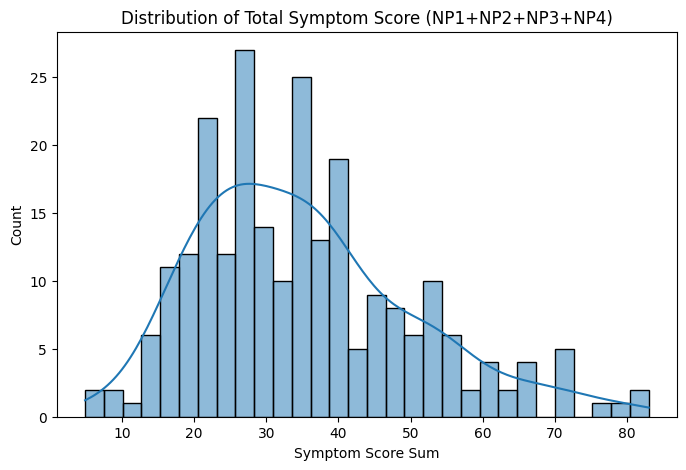

In [193]:
# ---- Distribution of Symptom Score ----
plt.figure(figsize=(8, 5))
sns.histplot(df['SYMPTOM_SUM'], bins=30, kde=True)
plt.title("Distribution of Total Symptom Score (NP1+NP2+NP3+NP4)")
plt.xlabel("Symptom Score Sum")
plt.ylabel("Count")
plt.show()


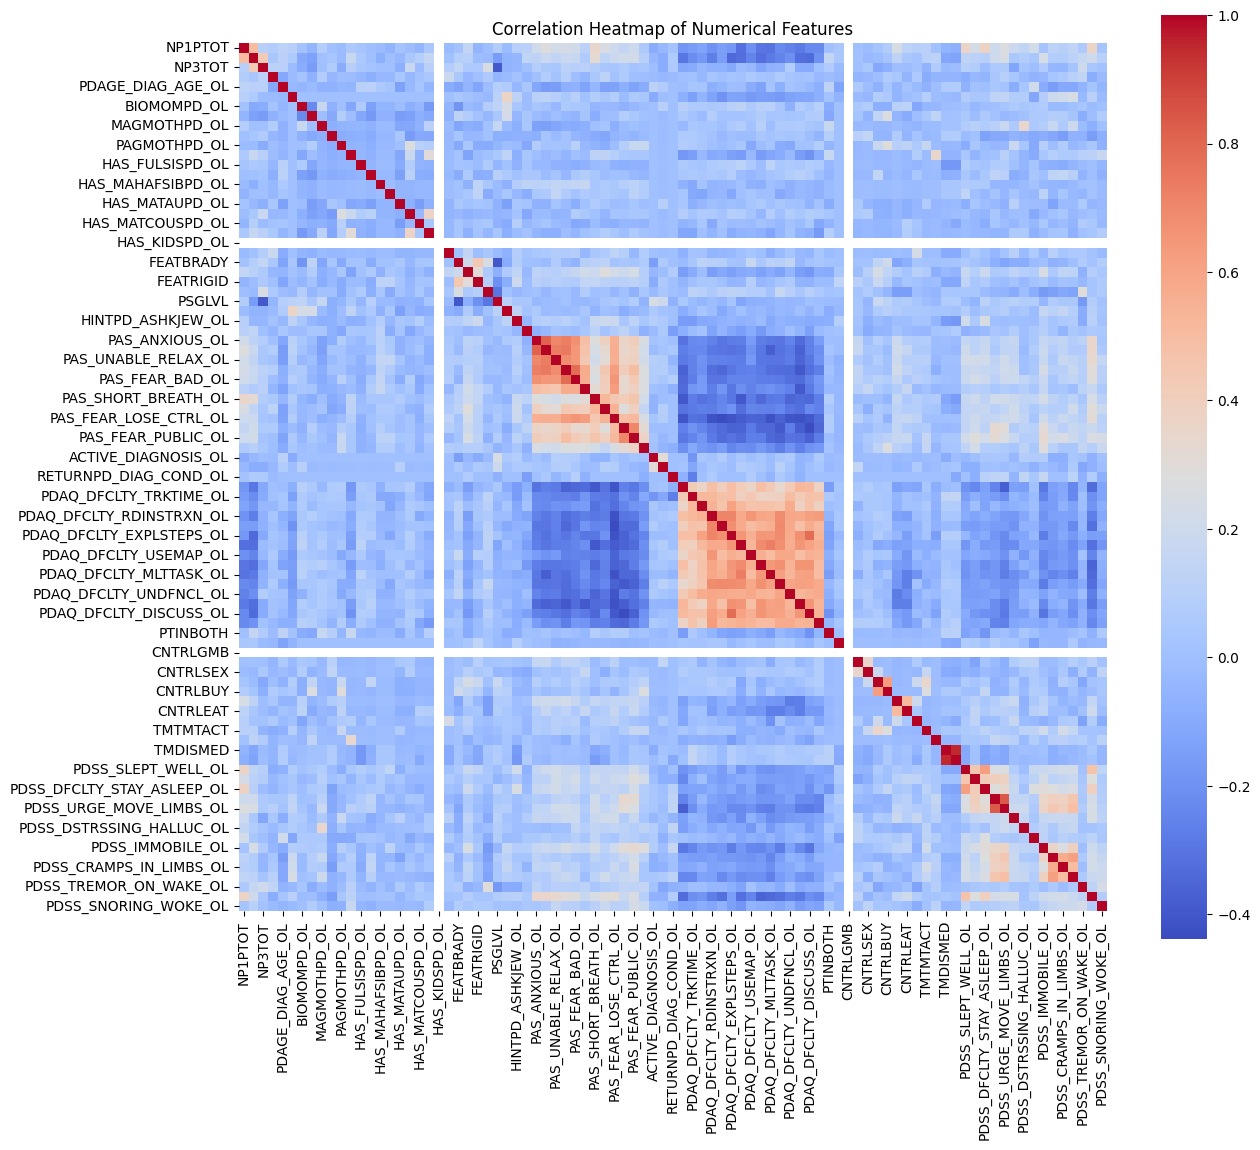

In [194]:
# ---- Correlation Heatmap ----
plt.figure(figsize=(14, 12))
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, cmap='coolwarm', square=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


Stage Distribution:
STAGE
Moderate    128
Severe      106
No/Mild       7
Name: count, dtype: int64


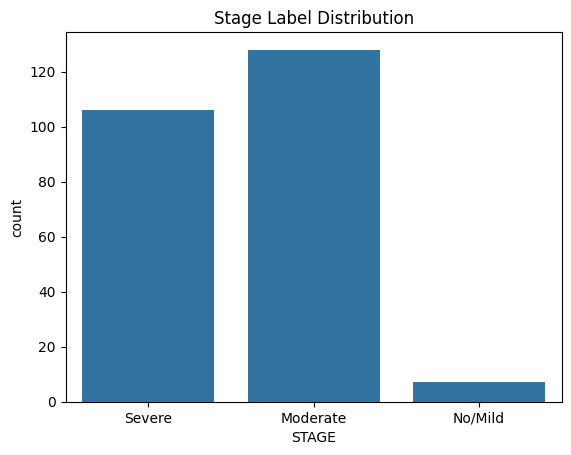

In [195]:
# ---- Stage Distribution ----
print("\nStage Distribution:")
print(df['STAGE'].value_counts())
sns.countplot(x='STAGE', data=df)
plt.title("Stage Label Distribution")
plt.show()

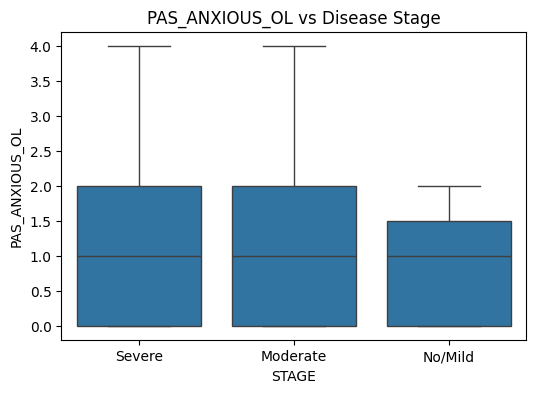

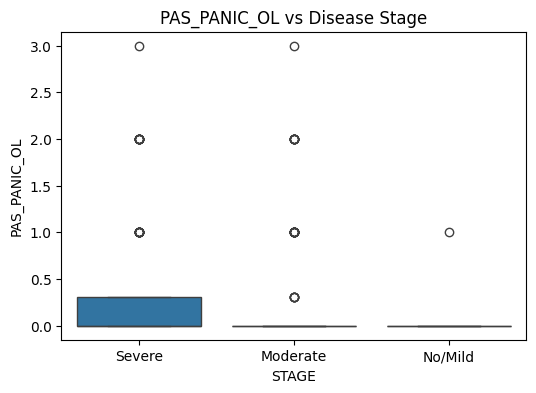

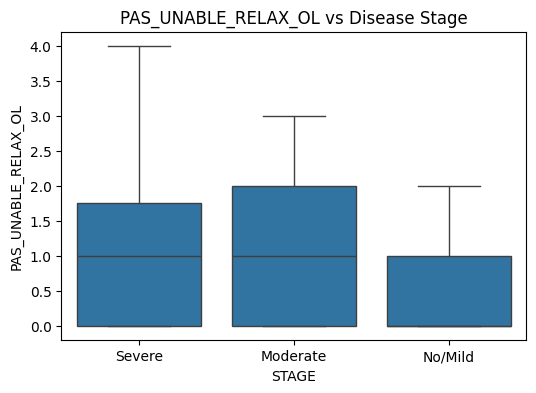

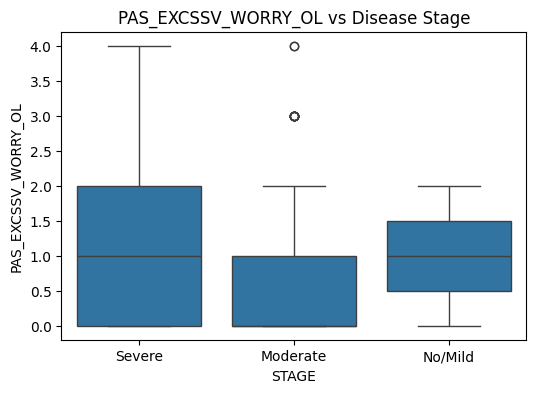

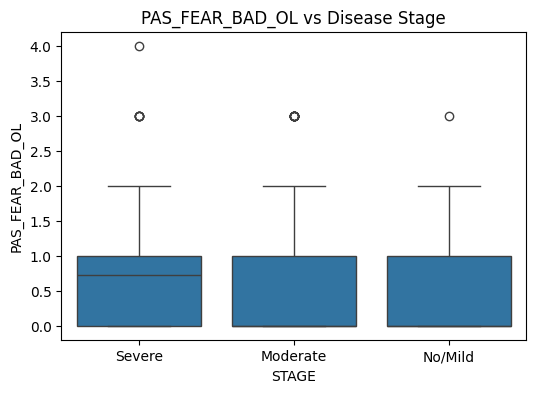

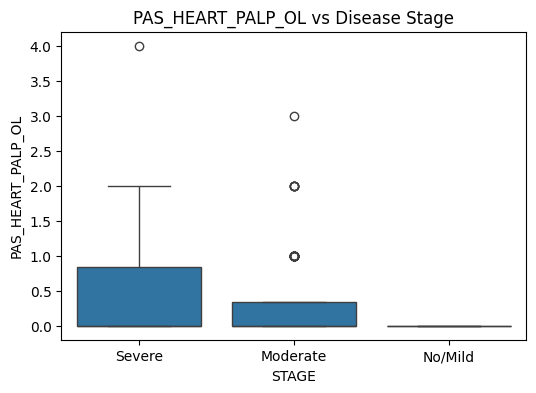

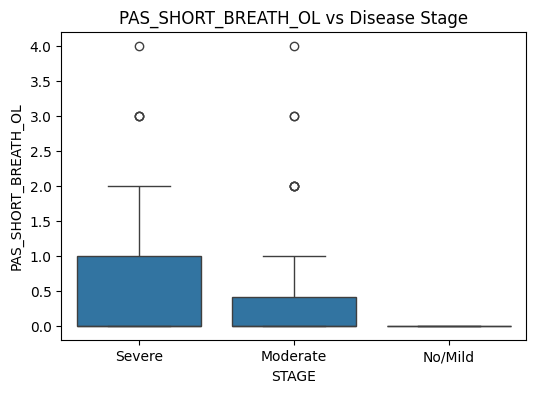

In [196]:
# ✅ EDA: Psychological Features vs Symptom Stage
psych_features = [
    'PAS_ANXIOUS_OL', 'PAS_PANIC_OL', 'PAS_UNABLE_RELAX_OL', 'PAS_EXCSSV_WORRY_OL',
    'PAS_FEAR_BAD_OL', 'PAS_HEART_PALP_OL', 'PAS_SHORT_BREATH_OL'
]

for feature in psych_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='STAGE', y=feature, data=df)
    plt.title(f"{feature} vs Disease Stage")
    plt.show()


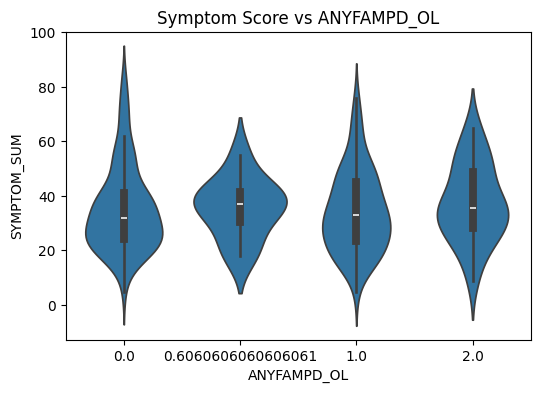

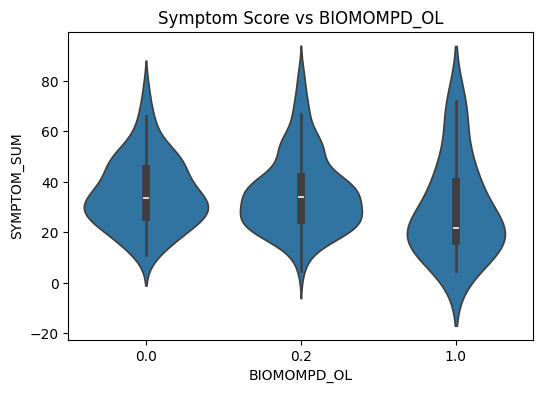

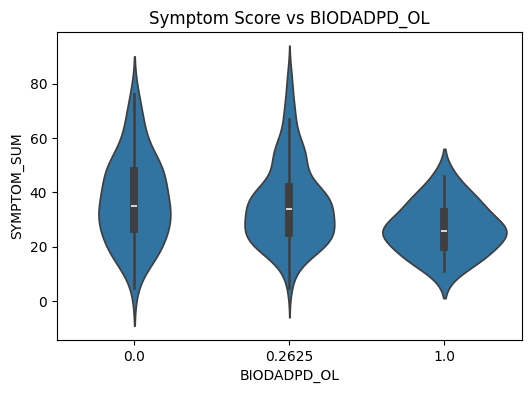

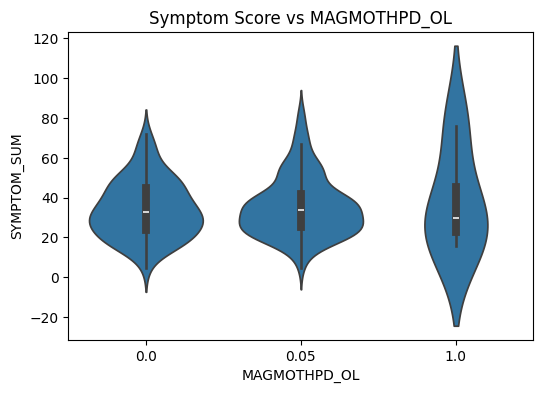

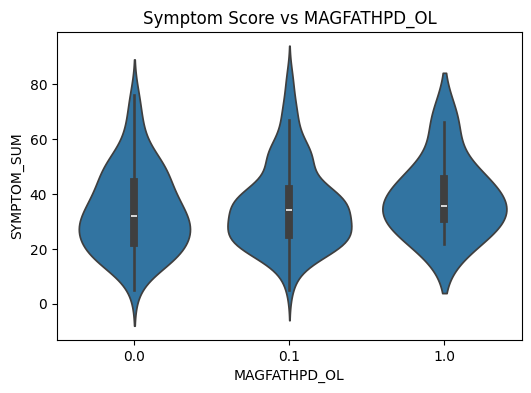

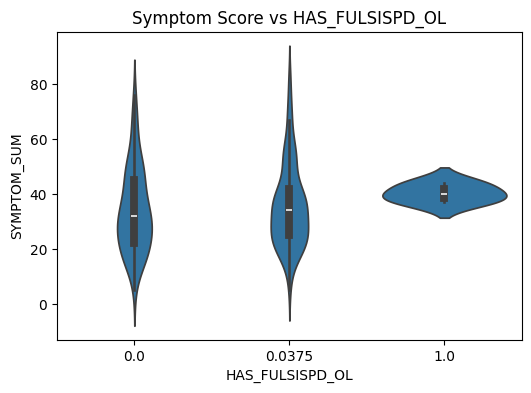

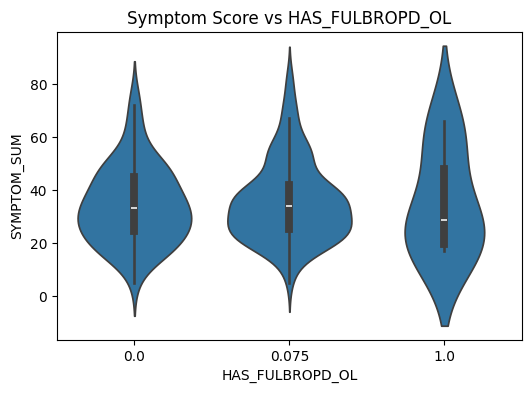

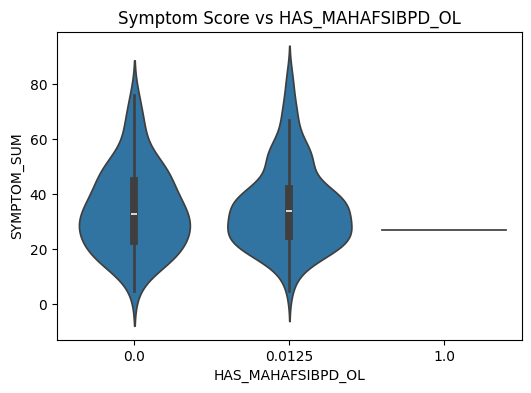

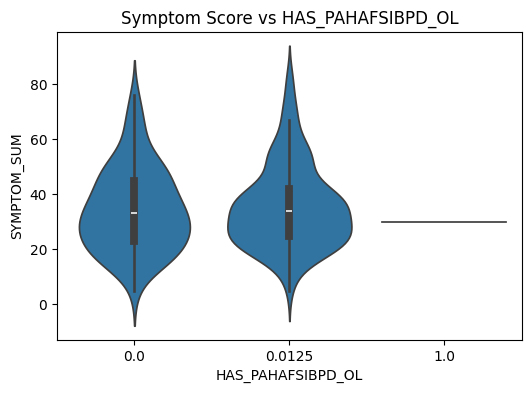

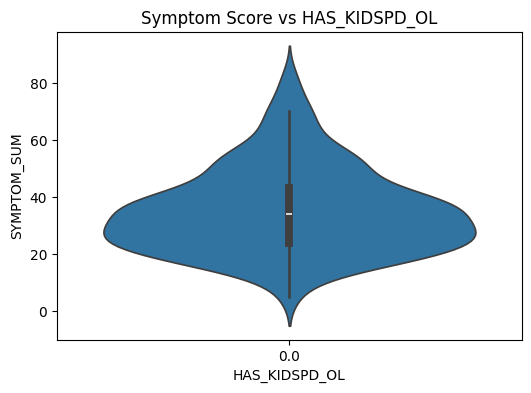

In [197]:

# ✅ EDA: Family History Features vs Symptom Score
fam_features = [
    'ANYFAMPD_OL', 'BIOMOMPD_OL', 'BIODADPD_OL', 'MAGMOTHPD_OL', 'MAGFATHPD_OL',
    'HAS_FULSISPD_OL', 'HAS_FULBROPD_OL', 'HAS_MAHAFSIBPD_OL', 'HAS_PAHAFSIBPD_OL',
    'HAS_KIDSPD_OL'
]

for feature in fam_features:
    plt.figure(figsize=(6, 4))
    sns.violinplot(x=df[feature], y=df['SYMPTOM_SUM'])
    plt.title(f"Symptom Score vs {feature}")
    plt.xlabel(feature)
    plt.ylabel("SYMPTOM_SUM")
    plt.show()


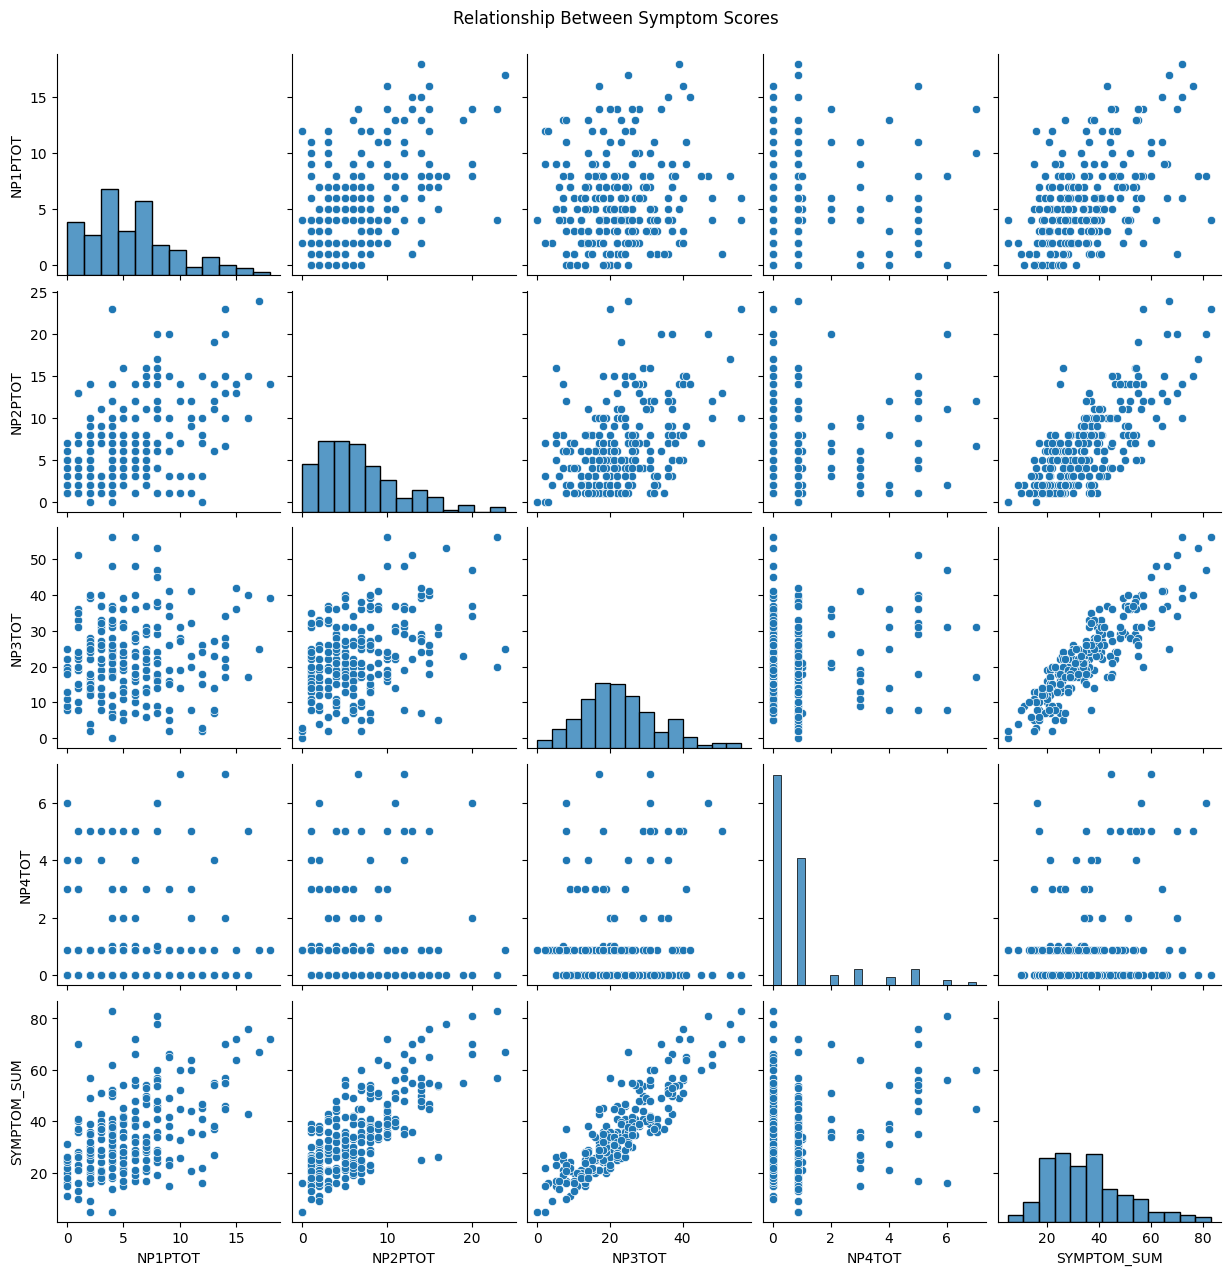

In [198]:

# ---- Pairplot of Key Symptoms ----
sns.pairplot(df[symptom_cols + ['SYMPTOM_SUM']])
plt.suptitle("Relationship Between Symptom Scores", y=1.02)
plt.show()

In [199]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

In [200]:
# Encode labels
#converting categorical labels (text) into numeric values
label_enc = LabelEncoder()
df['STAGE_ENC'] = label_enc.fit_transform(df['STAGE'])

In [201]:
# Optional binary classification label
df['HAS_DISEASE'] = df['SYMPTOM_SUM'].apply(lambda x: 1 if x > 0 else 0)

In [202]:
# Convert Yes/No to 0/1
for col in df.columns:
    if df[col].dtype == object:
        df[col] = df[col].map({'Yes': 1, 'No': 0, 'True': 1, 'False': 0})

In [203]:
# Drop original stage
df = df.drop(columns=['STAGE'])


In [204]:
# Train/Test split
X = df.drop(columns=['STAGE_ENC']) #all other columns (features) used for training. 
#drop 'STAGE_ENC' from X to avoid leaking the answer into the inputs.

y = df['STAGE_ENC'] # tells the model what you're predicting.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [205]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import (
    accuracy_score, precision_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
)
from scipy.stats import zscore

In [206]:
# Decision Tree 
# -------------------------
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)

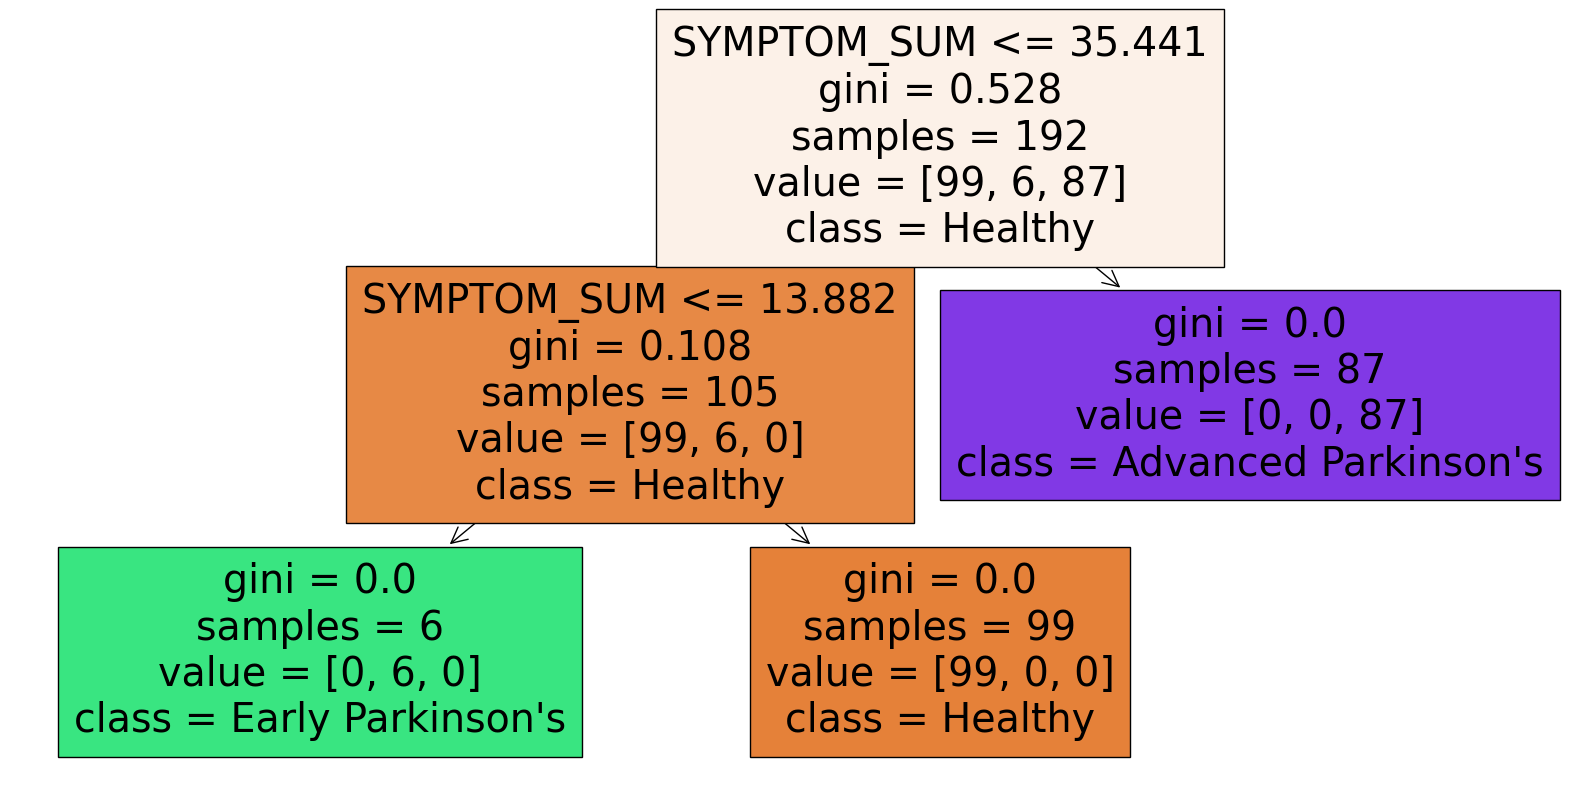

In [207]:
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=["Healthy", "Early Parkinson's", "Advanced Parkinson's"])
plt.show()

In [208]:
# Logistic Regression
# ------------------------------
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

In [209]:
# Support Vector Machine (SVM)
# ------------------------------
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
svm_preds = svm.predict(X_test)

In [210]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

In [211]:
# Random Forest for Feature Importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(20)

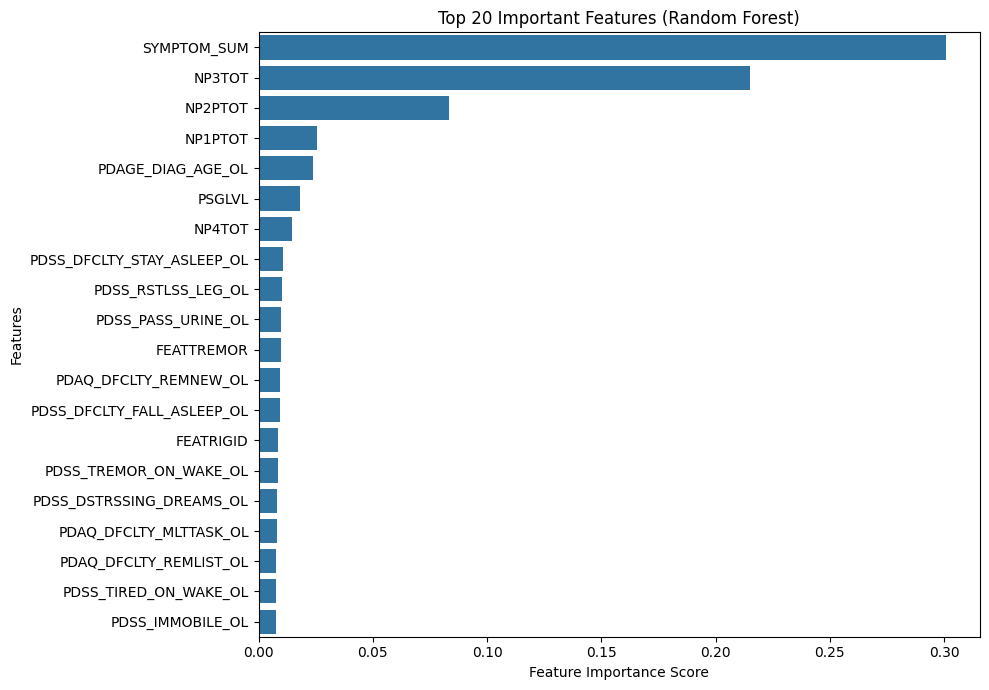

In [212]:
# Plot Feature Importance
plt.figure(figsize=(10, 7))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 20 Important Features (Random Forest)")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [213]:
# Select Features
sfm = SelectFromModel(rf, threshold="median", prefit=True)
X_selected = sfm.transform(X)
selected_features = X.columns[sfm.get_support()]
print("Selected features based on tree importance:\n", list(selected_features))

Selected features based on tree importance:
 ['NP1PTOT', 'NP2PTOT', 'NP3TOT', 'NP4TOT', 'PDAGE_DIAG_AGE_OL', 'PAGMOTHPD_OL', 'HAS_PATAUPD_OL', 'FEATBRADY', 'FEATRIGID', 'FEATTREMOR', 'PSGLVL', 'HINTPD_HAS_PD_REL1D_OL', 'HINTPD_ASHKJEW_OL', 'HYPOSMIA_OL', 'PAS_ANXIOUS_OL', 'PAS_TENSE_OL', 'PAS_UNABLE_RELAX_OL', 'PAS_EXCSSV_WORRY_OL', 'PAS_FEAR_BAD_OL', 'PAS_SHORT_BREATH_OL', 'PAS_HEART_PALP_OL', 'PAS_FEAR_SOCIAL_OL', 'PAS_FEAR_PUBLIC_OL', 'RETURNPD_DIAG_STATUS_OL', 'PDAQ_DFCLTY_READ_OL', 'PDAQ_DFCLTY_RDINSTRXN_OL', 'PDAQ_DFCLTY_UNFPRBLM_OL', 'PDAQ_DFCLTY_REMLIST_OL', 'PDAQ_DFCLTY_REMNEW_OL', 'PDAQ_DFCLTY_MLTTASK_OL', 'PDAQ_DFCLTY_NWGADG_OL', 'PDAQ_DFCLTY_TRNTHGHT_OL', 'PDSS_SLEPT_WELL_OL', 'PDSS_DFCLTY_FALL_ASLEEP_OL', 'PDSS_DFCLTY_STAY_ASLEEP_OL', 'PDSS_RSTLSS_LEG_OL', 'PDSS_URGE_MOVE_LIMBS_OL', 'PDSS_DSTRSSING_DREAMS_OL', 'PDSS_PASS_URINE_OL', 'PDSS_IMMOBILE_OL', 'PDSS_PAIN_IN_LIMBS_OL', 'PDSS_CRAMPS_IN_LIMBS_OL', 'PDSS_PAIN_POST_OF_LIMBS_OL', 'PDSS_TREMOR_ON_WAKE_OL', 'PDSS_TIRED_ON_

In [214]:
# XGBoost Classifier
# ------------------------------
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

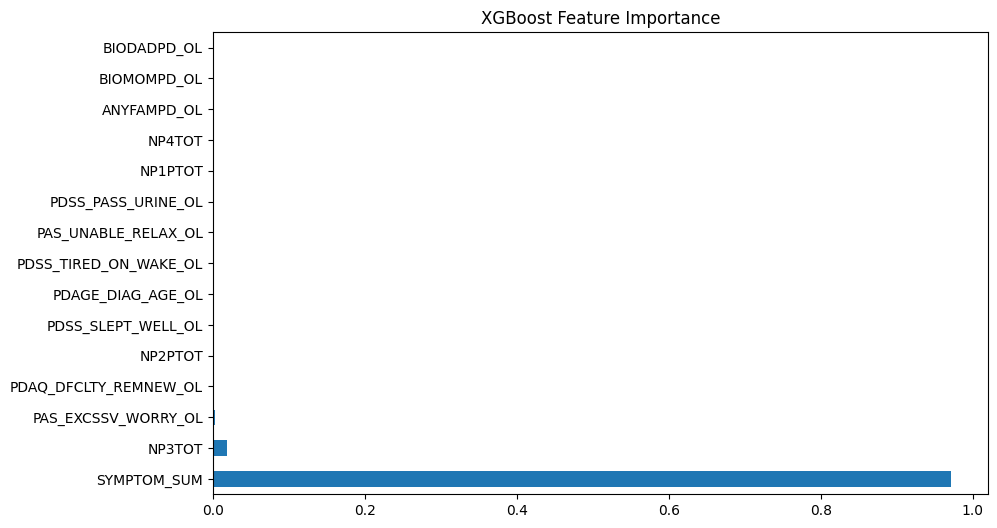

In [215]:
# Plot Feature Importance (XGBoost)
# ------------------------------
plt.figure(figsize=(10, 6))
xgb_importance = pd.Series(xgb.feature_importances_, index=X.columns)
xgb_importance.nlargest(15).plot(kind='barh')
plt.title('XGBoost Feature Importance')
plt.show()

In [216]:
# Select Features (Optional: Keep top 10)
# ------------------------------
#Series of feature importances generated from a previously trained XGBoost model.
top_features = xgb_importance.nlargest(10).index
X_train_sel = X_train[top_features]
X_test_sel = X_test[top_features]


# Train a fresh Random Forest on the full feature set for feature selection
rf.fit(X_train_sel, y_train)
sel_preds = rf.predict(X_test_sel)

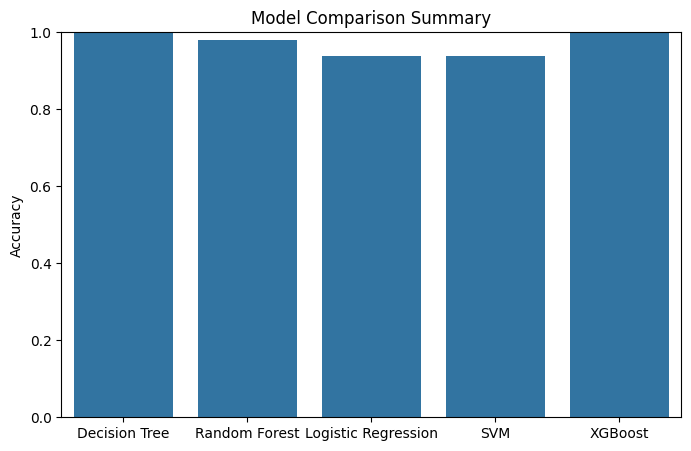

In [217]:
# Show Model Comparison Summary
# ------------------------------
models = ['Decision Tree' , 'Random Forest', 'Logistic Regression', 'SVM', 'XGBoost']
accuracies = [
    (dt_preds == y_test).mean(),
    (rf_preds == y_test).mean(),
    (lr_preds == y_test).mean(),
    (svm_preds == y_test).mean(),
    (xgb_preds == y_test).mean()
]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies)
plt.ylabel('Accuracy')
plt.title('Model Comparison Summary')
plt.ylim(0, 1)
plt.show()

In [218]:
# Use the selected features
X_final = X[selected_features]
y_final = y

In [219]:
# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

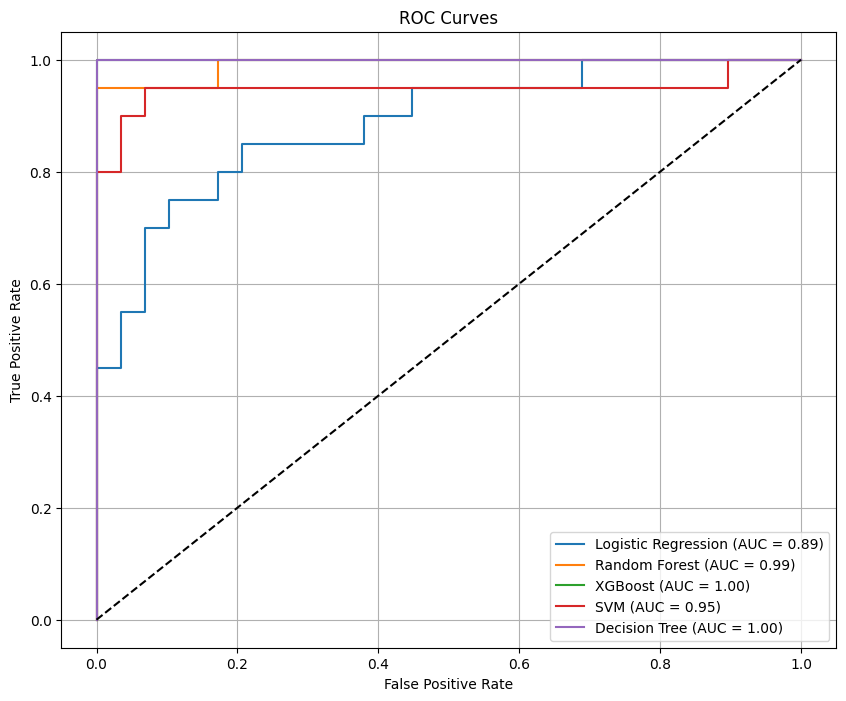

In [220]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss'),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier()
}
# Step 1: Replace 2 with 1 BEFORE train-test split
y = y.replace({2: 1})

# Step 2: Then split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = []
unique_labels = sorted(np.unique(y_test))

plt.figure(figsize=(10, 8))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    z = zscore(y_pred)[0] if len(y_pred) > 1 else 0
    cm = confusion_matrix(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "F1 Score": f1,
        "Precision": precision,
        "Z-score": z,
        "Confusion Matrix": cm
    })

    # Plot ROC curve if probabilities are available
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.grid()
plt.show()



                 Model  Accuracy  F1 Score  Precision   Z-score
0  Logistic Regression  0.816327  0.780488   0.761905 -0.866025
1        Random Forest  0.979592  0.974359   1.000000 -0.795822
2              XGBoost  1.000000  1.000000   1.000000 -0.830455
3                  SVM  0.938776  0.923077   0.947368 -0.795822
4        Decision Tree  1.000000  1.000000   1.000000 -0.830455

Confusion Matrix for Logistic Regression:
[[24  5]
 [ 4 16]]


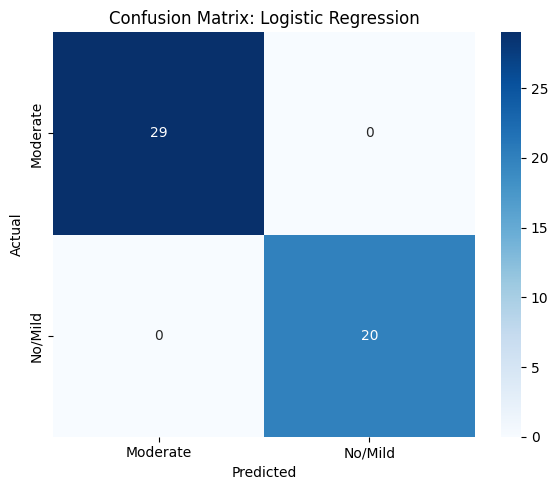


Confusion Matrix for Random Forest:
[[29  0]
 [ 1 19]]


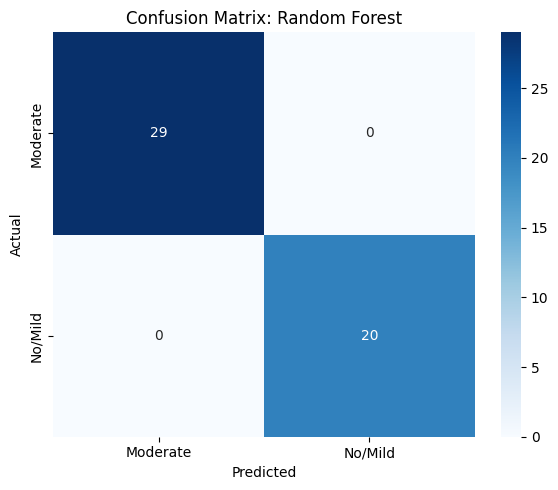


Confusion Matrix for XGBoost:
[[29  0]
 [ 0 20]]


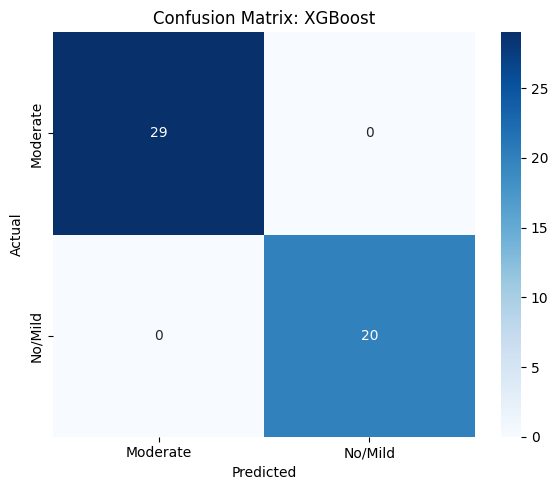


Confusion Matrix for SVM:
[[28  1]
 [ 2 18]]


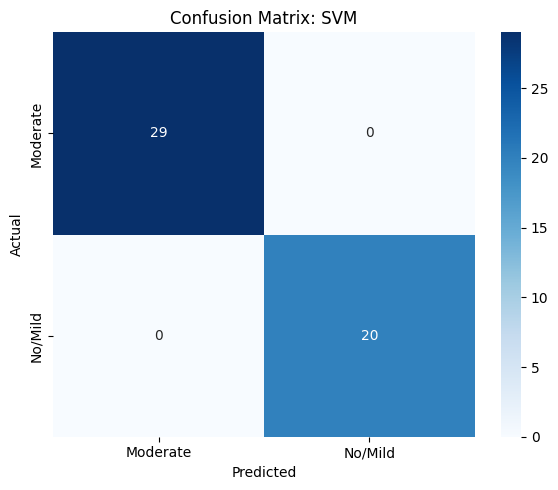


Confusion Matrix for Decision Tree:
[[29  0]
 [ 0 20]]


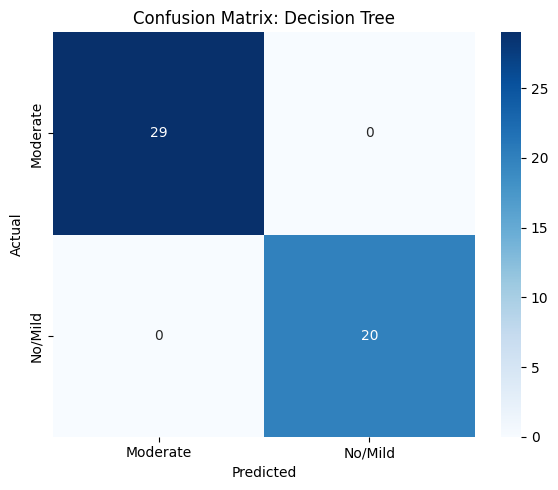

In [221]:
# Display metrics
import pandas as pd
metrics_df = pd.DataFrame(results)[["Model", "Accuracy", "F1 Score", "Precision", "Z-score"]]
print(metrics_df)

# Display confusion matrices
for r in results:
    print(f"\nConfusion Matrix for {r['Model']}:\n{r['Confusion Matrix']}")
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
                xticklabels=label_enc.inverse_transform(unique_labels),
                yticklabels=label_enc.inverse_transform(unique_labels))
    plt.title(f"Confusion Matrix: {r['Model']}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()
